<a href="https://colab.research.google.com/github/Utsuk7/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="/content/spam.csv"
import chardet
with open(url, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df= pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
df.sample(10)

,target,text
1492,ham,In the end she might still vomit but its okay....
4624,ham,I'm on the bus. Love you
3155,ham,Long time. You remember me today.
4441,ham,Dear i am not denying your words please
4275,ham,Can you please send me my aunty's number
5374,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
3870,ham,Yeah my usual guy's out of town but there're d...
2917,ham,Thanks chikku..:-) gud nyt:-*
1545,ham,"Good afternoon, my love ! Any job prospects ? ..."
4565,ham,Should i buy him a blackberry bold 2 or torch....


In [9]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [10]:
df['target']=encoding.fit_transform(df['target'])

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Mandatory Steps

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

# EDA

In [16]:
# check percentage of data which is spam and ham respectively
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

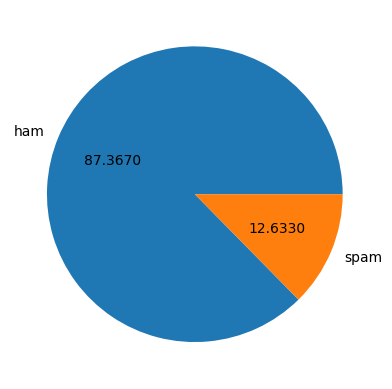

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.4f")
plt.show() #data is imbalance

In [18]:
import nltk

In [19]:
df['len_characters']=df['text'].apply(len)
df.head()

,target,text,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['len_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,len_characters,len_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df[['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='len_characters', ylabel='Count'>

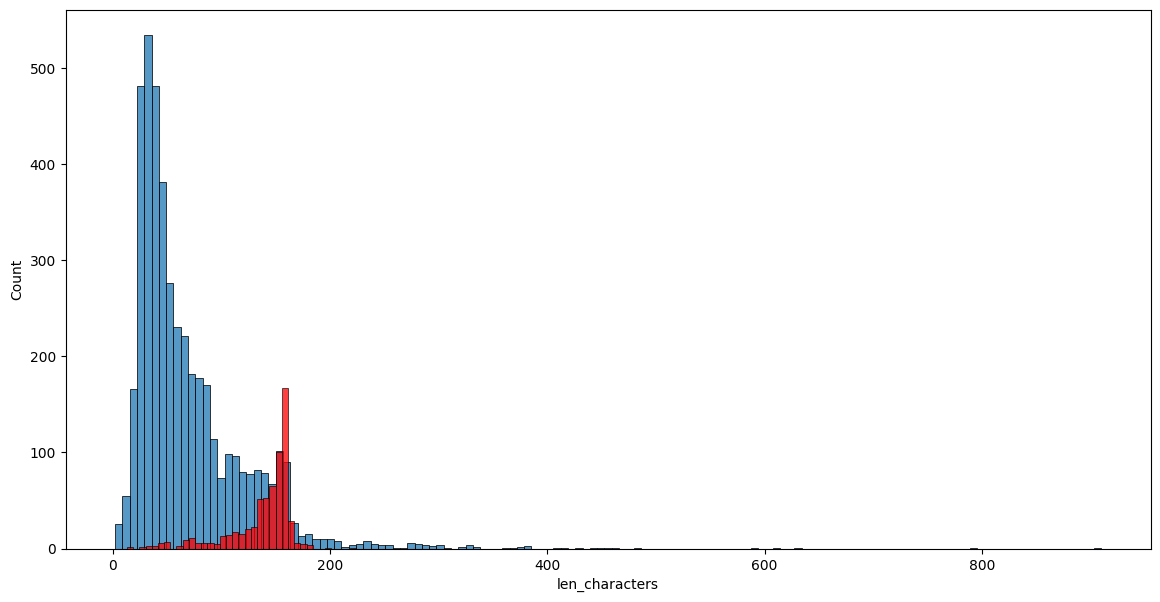

In [27]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_characters'])
sns.histplot(df[df['target']==1]['len_characters'],color='r')

<Axes: xlabel='len_word', ylabel='Count'>

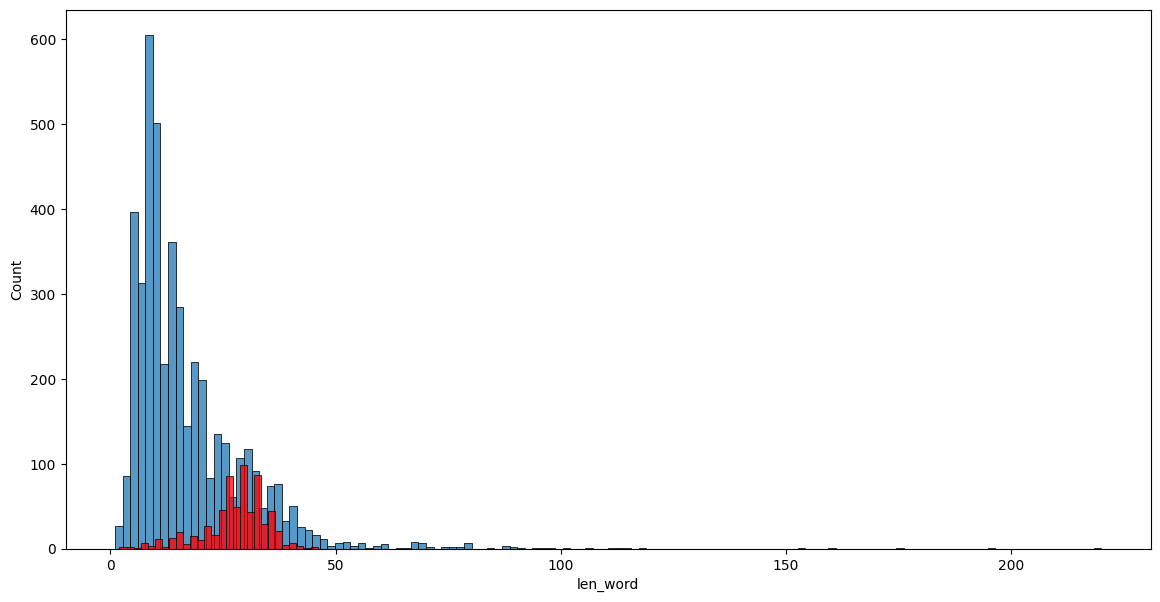

In [28]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_word'])
sns.histplot(df[df['target']==1]['len_word'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

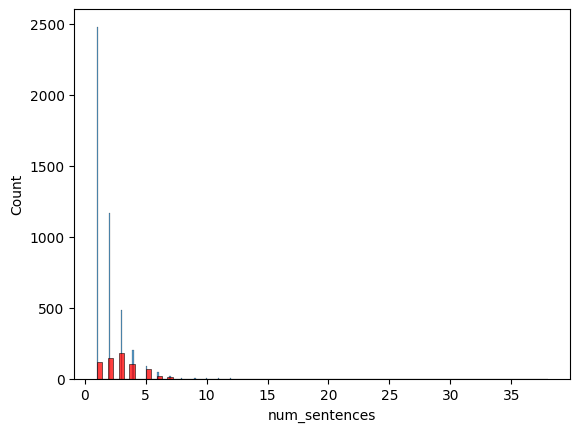

In [29]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

<ipython-input-30-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

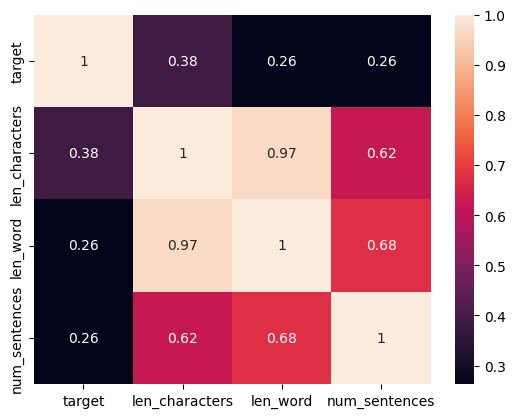

In [30]:
sns.heatmap(df.corr(),annot=True)

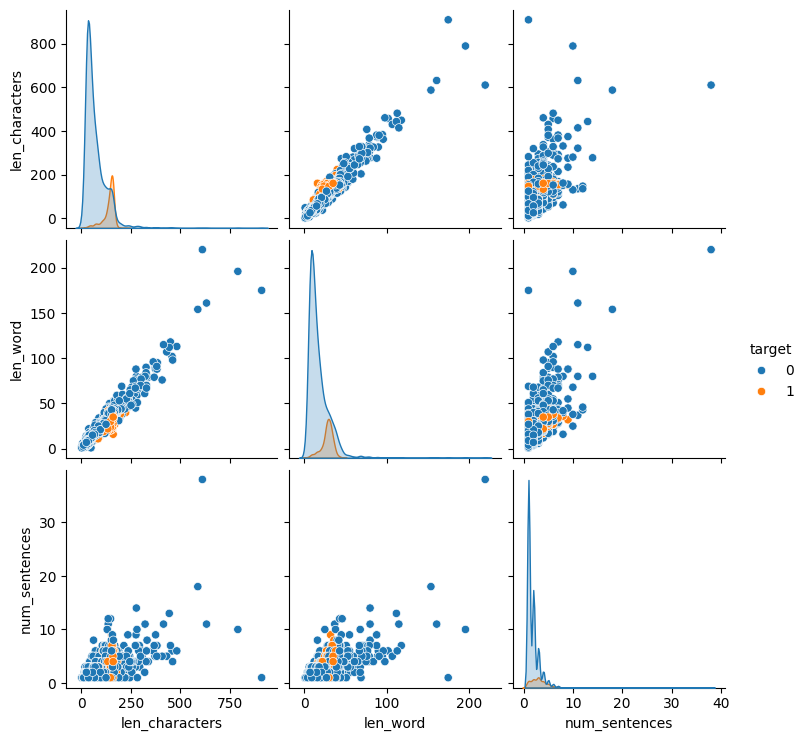

In [31]:
sns.pairplot(df,hue='target')
plt.show()

#Preprocessing

In [34]:
'''
lower case
tokenisation
special characters
removing stop words and punctuation
stemming
'''

'\nlower case\ntokenisation\nspecial characters\nremoving stop words and punctuation\nstemming\n'

In [51]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
ps=PorterStemmer()
#ps.stem("playing")

In [74]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  ans=[]

  for i in text:
    if i.isalnum():
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    ans.append(ps.stem(i))

  return " ".join(ans)


In [75]:
#transform_text("I love playing football. i play center forward")

In [76]:
df['preprocessed_text']=df['text'].apply(transform_text)

In [77]:
df.head()

,target,text,len_characters,len_word,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [80]:
# extracting most frequent words from spam messages
spam_wc=wc.generate(df[df['target']==1]['preprocessed_text'].str.cat(sep=' '))

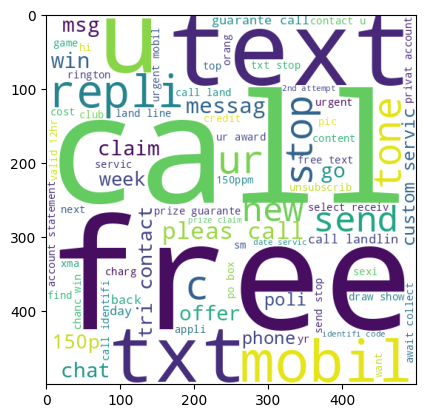

In [81]:
plt.imshow(spam_wc)

In [85]:
# extracting most frequent words from ham message
ham_wc=wc.generate(df[df['target']==0]['preprocessed_text'].str.cat(sep=" "))

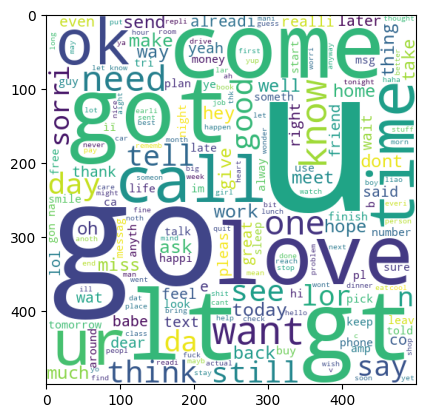

In [86]:
plt.imshow(ham_wc)

In [99]:
# count of top 30 most repeated words
freq_spam=[]
for msg in df[df['target']==1]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_spam.append(word)


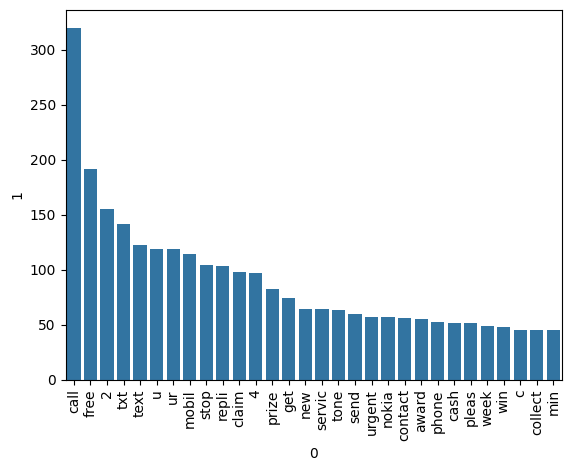

In [102]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_spam).most_common(30)),x=pd.DataFrame(Counter(freq_spam).most_common(30))[0],y=pd.DataFrame(Counter(freq_spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [101]:
# count of top 30 most repeated words from ham

freq_ham=[]
for msg in df[df['target']==0]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_ham.append(word)


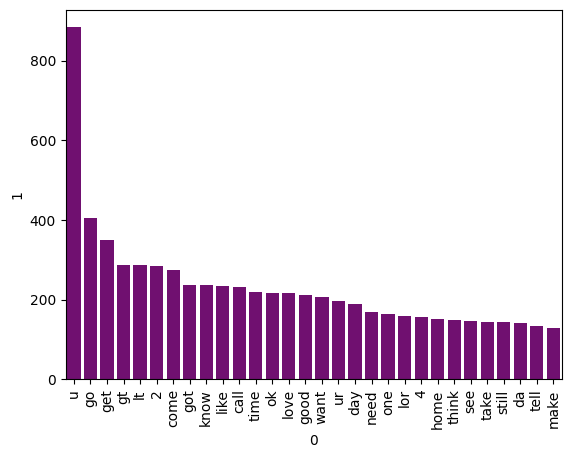

In [104]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_ham).most_common(30)),x=pd.DataFrame(Counter(freq_ham).most_common(30))[0],y=pd.DataFrame(Counter(freq_ham).most_common(30))[1],color='purple')
plt.xticks(rotation='vertical')
plt.show()